# Social Media Data

For this part, we worked on collecting data from social media to complement our already existing data on Jobs. For the first part, we used the Twitter API to collect data on various topics related to our domain, including tweets about COVID jobs, Corona jobs and Temporary jobs. 
We used Python to analyze this tweet data and determine what tags were most popular and trending within our domain. 

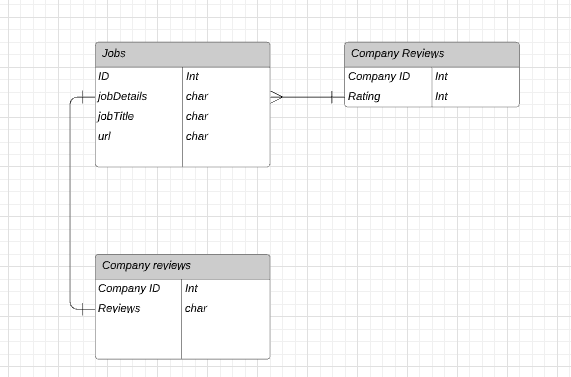

In [16]:
from IPython.display import Image
Image(r'/Users/karansoni/Desktop/basic-er.png')

### Collecting Social Media Data 

In [4]:
#We first imported all libraries that we would be using throughout:
import csv
import json
import pandas as pd
import tweepy
import re
import numpy as np
import pandas as pd
import collections

In [5]:
# API keys and tokens
consumer_key = "mGtIt09UVXyzyW5LMBx6YKSIg"  
consumer_secret = "DCi2axya3I6iRdxLvnNzPbInscCA7oquTaZKJqSK2WOCDriwjp"  
access_token = "1238579197867524096-EhwxltGCsYmzWsDYoW9JsIqT3Yghck"  
access_token_secret = "2EBkSz2GRrC8w0tdpPxKEVGC4swpAQsDDoNkUMbKresIg"

# Establish connection with twitter API using developer keys
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)  
auth.set_access_token(access_token, access_token_secret)  
api = tweepy.API(auth, wait_on_rate_limit=True)

Next, we wrote a function to collect 100 tweets (combination of most popular and most recent tweets) by making an API request using the Cursor function from the tweepy library. The function works by searching for tweets that have a specific search term in them, which the user can decide on. Each tweet is then stored in a dictionary (we collected information such as the username, tweet test, number of retweets, hashtags, etc.). The function, in the end, returns all the tweets as a dataframe.

In [6]:
# Funtion to collect information on 100 tweets that contain a particular search term
def get_tweets(search_term):
    all_tweets = []
    # Make API request for tweets in English that contain search_term
    for tweet in tweepy.Cursor(api.search, q=search_term,lang = "en").items(100):
        # Store all tweets in dictionary
        all_tweets += [{ 'Tweet_id': tweet.id,
                'Screen_name':tweet.author.screen_name,
                'Created_at':tweet.created_at,
                'Tweet_text':tweet.text,
                'Hashtags':re.findall(r"#(\w+)",tweet.text),
                'Retweets':tweet.retweet_count,
                'Favorites':tweet.favorite_count,
                'Location':tweet.user.location}]
    # Return all tweets in dataframe format
    return pd.DataFrame(all_tweets)

Then, we used our function to collect 100 tweets relating to Corona Jobs, COVID jobs, Temporary jobs, all terms related to our domain. To ensure our funciton worked, we additionally used the .head() method to check the first few tweets.


In [7]:
# Get 100 tweews on CORONA Jobs (1)
all_tweets = get_tweets("#coronajobs")
corona_tweets = all_tweets
corona_tweets.head()

,Created_at,Favorites,Hashtags,Location,Retweets,Screen_name,Tweet_id,Tweet_text
0,2020-04-23 18:16:24,0,"[FurloughScheme, hmrc, furlough, itvnews, coro...",Portsmouth,1,cbuckland55,1253387259925200897,RT @BuckbeeLtd: How does the UK coronavirus jo...
1,2020-04-23 16:58:49,4,[],"Lancs, UK",0,Placeyplacey,1253367736371216384,Day two on the roof. Things I’ve learnt: Sun c...
2,2020-04-23 06:00:00,2,"[FurloughScheme, hmrc, furlough, itvnews]","Portsmouth, United Kingdom",1,BuckbeeLtd,1253201940424486913,How does the UK coronavirus job furlough schem...
3,2020-04-22 18:30:00,4,[],"Lancs, UK",0,Placeyplacey,1253028296499113985,A nice steady job today cleaning the roof.. on...
4,2020-04-20 06:14:28,1,"[thenewmullet, coronajobs, CoronavirusUSA]",,0,alanaspurs,1252118416099590152,Pajama bottoms or leggings with a dress shirt ...


In [8]:
# Get 100 tweews on COVID jobs (2)
all_tweets = get_tweets("#COVIDjobs")
covid_tweets = all_tweets
covid_tweets.head()

,Created_at,Favorites,Hashtags,Location,Retweets,Screen_name,Tweet_id,Tweet_text
0,2020-04-24 02:49:57,0,"[covidjobs, HelpdeskTech, PuebloColoradoJobs, ...","New York, NY",0,Reliableva1,1253516498750115847,HOT #covidjobs #HelpdeskTech 3 month contract ...
1,2020-04-23 22:26:49,0,"[COVIDJobs, jobs, hiring]","Newark, DE",0,bluehenprof,1253450278839476233,"Instacart hired 300,000 workers in a month. It..."
2,2020-04-23 21:20:04,1,[COVID19],"Olympia WA & Honolulu, HI",0,KalenaGirl,1253433482455289856,RT @SBAgov: NOW HIRING: SBA is hiring temporar...
3,2020-04-23 17:51:43,0,"[covid19, jointhewave]","Reston, VA",2,IamtheShepard,1253381050035773445,RT @IWLLC: We're still hiring during #covid19!...
4,2020-04-23 16:59:52,3,"[designtwitter, designjobs, covidjobs]","Bengaluru, India",0,Eddy4_friends,1253368002847797249,People in my TL!\n\nNeed your help! \n\n#desig...


In [9]:
# Get 100 tweews on Temporary jobs (3)
all_tweets = get_tweets("#temporaryjob")
temporary_tweets = all_tweets
temporary_tweets.head()

,Created_at,Favorites,Hashtags,Location,Retweets,Screen_name,Tweet_id,Tweet_text
0,2020-04-20 18:15:20,0,[],"Toronto, Ontario",0,StephDirecto,1252299828060499968,Knowing how to reference temporary work on a r...
1,2020-04-17 23:40:49,2,[TemporaryJob],"California, USA",0,OldSchoolNewsie,1251294574489694210,Nancy proves why Congress should be a #Tempora...
2,2020-04-17 19:29:11,0,[],"Liverpool, England",2,KaatieKustaard,1251231249101922304,RT @EmmaHixy: Anyone in Liverpool know of any ...
3,2020-04-17 17:08:24,0,[],"Liverpool, England",2,amymartin_x,1251195822089347072,RT @EmmaHixy: Anyone in Liverpool know of any ...
4,2020-04-17 13:18:54,0,[],,2,EmmaHixy,1251138064480698370,Anyone in Liverpool know of any temporary jobs...


In [10]:
# Function to extract all tags from the data frame
def get_hashtags(tweets):
    all_hashtags = []
    # Loop through each row in data frame
    for index, row in tweets.iterrows():
        # Extract all tags and split them up
        tweet_hashtags = row['Hashtags']
        for tag in tweet_hashtags:
            # Remove any extra space and add to the list of all tags
            tag = tag.replace("'", "")
            all_hashtags.append(tag.replace(" ", ""))
 
    # Remove all blank entries
    while("" in all_hashtags) : 
        all_hashtags.remove("")
        
    return all_hashtags

In [11]:
# Find and print most popular tags for COVID Jobs 
covid_tags = get_hashtags(covid_tweets)
print(covid_tags)

['covidjobs', 'HelpdeskTech', 'PuebloColoradoJobs', 'BrunswickGeorgiaJobs', 'applynow', 'jobsearchtips', 'COVIDJobs', 'jobs', 'hiring', 'COVID19', 'covid19', 'jointhewave', 'designtwitter', 'designjobs', 'covidjobs', 'covid19', 'jointhewave', 'covid19', 'jointhewave', 'workfromhome', 'hiring', 'covid19', 'jointhewave', 'covid19', 'jointhewave', 'telework', 'WorkFromHome', 'jobsearch', 'remotework', 'remotejo', 'WorkFromHome', 'jobsearch', 'remotework', 'Livepooljobs', 'covidjobs', 'Covid', 'jointhewave', 'jointhewave', 'jointhewave', 'telework']


In [13]:
# Find and print most popular tags for Corona Jobs 
corona_tags = get_hashtags(corona_tweets)
print(corona_tags)

['FurloughScheme', 'hmrc', 'furlough', 'itvnews', 'coronajobs', 'unem', 'FurloughScheme', 'hmrc', 'furlough', 'itvnews', 'thenewmullet', 'coronajobs', 'CoronavirusUSA', 'ConciousnessStream', 'coronajobs', 'Music', 'CoronaJobs', 'coronajobs', 'CoronaJobs']


In [15]:
# Find and print most popular tags for temporary Jobs 
temporary_tags = get_hashtags(temporary_tweets)
print(temporary_tags)

['TemporaryJob']


## CONCLUSION

The primary focus of this notebooks was learnign how to gather and analyze social media data. 


## CITATIONS

https://developer.twitter.com/en/docs/tweets/search/api-reference/get-search-tweets (Twitter API Documentation- help with collecting Twitter data)
https://github.com/INFO6210/Assignment-3/blob/master/DericAnjaSoniKaran_INFO6210_Assignment3.ipynb


## LICENSE

Copyright 2020 Karan Soni
Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.
THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.